In [ ]:
import tarfile

# Define the path to your tar file
tar_file_path = '/content/drive/MyDrive/TextClassificationDatasets/amazon_review_full_csv.tar.gz'
# Define the directory where you want to extract the contents
extract_directory = '/content/'

try:
    # Open the tar file in read mode
    with tarfile.open(tar_file_path, 'r') as tar:
        # Extract all contents to the specified directory
        tar.extractall(path=extract_directory)
    print(f"All contents of '{tar_file_path}' extracted to '{extract_directory}' successfully.")
except tarfile.ReadError:
    print(f"Error: '{tar_file_path}' is not a valid tar archive or is corrupted.")
except FileNotFoundError:
    print(f"Error: The file '{tar_file_path}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

All contents of '/content/drive/MyDrive/TextClassificationDatasets/amazon_review_full_csv.tar.gz' extracted to '/content/' successfully.


In [ ]:
import pandas as pd

in_csv = '/content/amazon_review_full_csv/train.csv'  # Replace with your CSV file name
rowsize = int(len(pd.read_csv(in_csv)) / 4) # Number of rows per output CSV file

for i, chunk in enumerate(pd.read_csv(in_csv, chunksize=rowsize)):
    out_csv = f'output_chunk_{i}.csv'
    chunk.to_csv(out_csv, index=False)
    print(f"Saved {out_csv}")

Saved output_chunk_0.csv
Saved output_chunk_1.csv
Saved output_chunk_2.csv
Saved output_chunk_3.csv
Saved output_chunk_4.csv


In [ ]:
x = pd.read_csv('/content/output_chunk_0.csv')

In [ ]:
x.head()

,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
0,5,Inspiring,I hope a lot of people hear this cd. We need m...
1,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
3,5,Too good to be true,Probably the greatest soundtrack in history! U...
4,5,There's a reason for the price,"There's a reason this CD is so expensive, even..."


In [ ]:
headers = ['rating','title','review']
x.columns = headers
x = x.drop('title',axis = 1)

In [ ]:
x.head()

,rating,review,label
0,5,I hope a lot of people hear this cd. We need m...,2
1,5,I'm reading a lot of reviews saying that this ...,2
2,4,The music of Yasunori Misuda is without questi...,2
3,5,Probably the greatest soundtrack in history! U...,2
4,5,"There's a reason this CD is so expensive, even...",2


In [ ]:
x = x.sample(frac=1).reset_index(drop=True)
x.head()

,rating,review,label
0,4,Done before Fatal Attraction and done better b...,2
1,5,I went a loooooooooooooong time before changin...,2
2,3,Good information. Poses are not easy to follow...,1
3,3,I'm a true fan of Coben's work. His new book i...,1
4,2,The Hugo Award has long been a guarantee of ex...,0


In [ ]:
def to_sentiment(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

x['label'] = x['rating'].apply(to_sentiment)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(x['review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(x['review'])

# Pad all sequences to the same length
padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')


In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

labels = to_categorical(x['label'], num_classes=3)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)  # (num_samples, 200)
print(y_train.shape)  # (num_samples, 3)


(599999, 200)
(599999, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,            # Increase as needed
    batch_size=64,
    verbose=1
)


Epoch 1/5
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 258s 27ms/step - accuracy: 0.6803 - loss: 0.7440 - val_accuracy: 0.7491 - val_loss: 0.5996
Epoch 2/5
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 211s 22ms/step - accuracy: 0.7580 - loss: 0.5898 - val_accuracy: 0.7594 - val_loss: 0.5744
Epoch 3/5
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 264s 23ms/step - accuracy: 0.7768 - loss: 0.5464 - val_accuracy: 0.7580 - val_loss: 0.5798
Epoch 4/5
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 212s 23ms/step - accuracy: 0.7918 - loss: 0.5143 - val_accuracy: 0.7608 - val_loss: 0.5829
Epoch 5/5
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 259s 22ms/step - accuracy: 0.8044 - loss: 0.4840 - val_accuracy: 0.7563 - val_loss: 0.6041


In [ ]:

chunk = pd.read_csv("output_chunk_1.csv", skiprows=range(1, 5001), nrows=5000)  # Example: rows 5001 to 10000



In [ ]:
headers = ['rating','title','review']
chunk.columns = headers
chunk = chunk.drop('title',axis = 1)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = chunk['review'].astype(str).tolist()
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')


In [ ]:
import numpy as np

pred_probs = model.predict(padded, batch_size=64)
pred_classes = np.argmax(pred_probs, axis=1)


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [ ]:
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
pred_sentiments = [label_map[p] for p in pred_classes]
chunk['predicted_sentiment'] = pred_sentiments


In [ ]:
chunk.to_csv("pred.csv")

/tmp/ipython-input-65-719364338.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(chunk, x='rating', y='predicted_sentiment', inner='box', palette='Dark2')


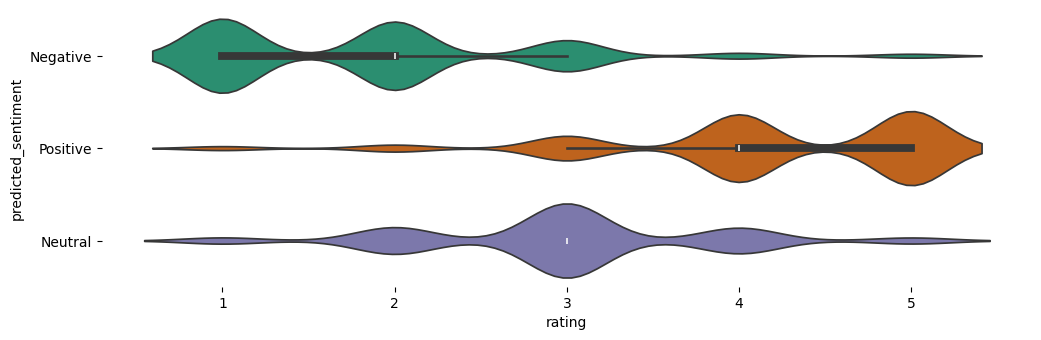

In [ ]:
# @title predicted_sentiment vs rating

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(chunk['predicted_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(chunk, x='rating', y='predicted_sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)